# Detecting Maclicious URLs using Machine Learning<br>

Steps followed in building the machine learning classifier<br>
1. Data Preprocessing / Feature Engineering
2. Data Visualization
3. Building Machine Learning Models using Lexical Features.

In [16]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import validators

In [17]:
urldata = pd.read_csv("urldata.csv")

In [18]:
urldata.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [19]:
#Removing the unnamed columns as it is not necesary.
urldata = urldata.drop('Unnamed: 0',axis=1)

In [20]:
urldata.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [21]:
urldata.shape

(450176, 3)

Since the standard library for url parsing we will be using does not automatically validate url, we will eliminate them beforehand

In [23]:
urldata['valid'] = urldata['url'].apply(lambda i: validators.url(i))

In [29]:
urldata=urldata[urldata['valid'] == True]

In [30]:
urldata.shape

(446397, 4)

In [31]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446397 entries, 0 to 450175
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     446397 non-null  object
 1   label   446397 non-null  object
 2   result  446397 non-null  int64 
 3   valid   446397 non-null  object
dtypes: int64(1), object(3)
memory usage: 17.0+ MB


Checking Missing Values

In [32]:
urldata.isnull().sum()

url       0
label     0
result    0
valid     0
dtype: int64

No missing values in any column.

## 1. DATA PREPROCESSING

The following features will be extracted from the URL for classification. <br>
<ol>
    <li>Length Features
    <ul>
        <li>Length Of Url</li>
        <li>Length of Hostname</li>
        <li>Length Of Path</li>
        <li>Length Of First Directory</li>
        <li>Length Of Top Level Domain</li>
    </ul>
    </li>
    <br>
   <li>Count Features
    <ul>
    <li>Count Of  '-'</li>
    <li>Count Of '@'</li>
    <li>Count Of '?'</li>
    <li>Count Of '%'</li>
    <li>Count Of '.'</li>
    <li>Count Of '='</li>
    <li>Count Of 'http'</li>
    <li>Count Of 'www'</li>
    <li>Count Of Digits</li>
    <li>Count Of Letters</li>
    <li>Count Of Number Of Directories</li>
    </ul>
    </li>
    <br>
    <li>Binary Features
    <ul>
        <li>Use of IP or not</li>
        <li>Use of Shortening URL or not</li>
    </ul>
    </li>
    
</ol>


### 1.1 Length Features

In [33]:
!pip install tld
!pip install validators

In [34]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld

In [35]:
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))

In [71]:
#Hostname Length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

In [37]:
#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

In [72]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

In [39]:
#Length of Top Level Domain
urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))

In [41]:
urldata.head()

,url,label,result,valid,url_length,path_length,fd_length,tld,tld_length
0,https://www.google.com,benign,0,True,22,0,0,com,3
1,https://www.youtube.com,benign,0,True,23,0,0,com,3
2,https://www.facebook.com,benign,0,True,24,0,0,com,3
3,https://www.baidu.com,benign,0,True,21,0,0,com,3
4,https://www.wikipedia.org,benign,0,True,25,0,0,org,3


In [47]:
#urldata = urldata.drop("tld",axis=1)
urldata = urldata.drop("valid",axis=1)

Dataset after extracting length features

In [48]:
urldata.head()

,url,label,result,url_length,path_length,fd_length,tld_length
0,https://www.google.com,benign,0,22,0,0,3
1,https://www.youtube.com,benign,0,23,0,0,3
2,https://www.facebook.com,benign,0,24,0,0,3
3,https://www.baidu.com,benign,0,21,0,0,3
4,https://www.wikipedia.org,benign,0,25,0,0,3


### 1.2 Count Features

In [49]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))

In [50]:
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))

In [51]:
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))

In [52]:
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))

In [53]:
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))

In [54]:
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))

In [55]:
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))

In [56]:
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))

In [57]:
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [58]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [59]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [73]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

Data after extracting Count Features

In [61]:
urldata.head()

,url,label,result,url_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0,22,0,0,3,0,0,0,0,2,0,1,1,1,0,17,0
1,https://www.youtube.com,benign,0,23,0,0,3,0,0,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,benign,0,24,0,0,3,0,0,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,benign,0,21,0,0,3,0,0,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,0,0,3,0,0,0,0,2,0,1,1,1,0,20,0


### 1.3 Binary Features

In [62]:
import re

In [74]:
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

In [75]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

Data after extracting Binary Features

In [76]:
urldata.head()

,url,label,result,url_length,path_length,fd_length,tld_length,count-,count@,count?,...,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url,hostname_length
0,https://www.google.com,benign,0,22,0,0,3,0,0,0,...,0,1,1,1,0,17,0,1,1,14
1,https://www.youtube.com,benign,0,23,0,0,3,0,0,0,...,0,1,1,1,0,18,0,1,1,15
2,https://www.facebook.com,benign,0,24,0,0,3,0,0,0,...,0,1,1,1,0,19,0,1,1,16
3,https://www.baidu.com,benign,0,21,0,0,3,0,0,0,...,0,1,1,1,0,16,0,1,1,13
4,https://www.wikipedia.org,benign,0,25,0,0,3,0,0,0,...,0,1,1,1,0,20,0,1,1,17


# 2. Data Visualization

<Axes: >

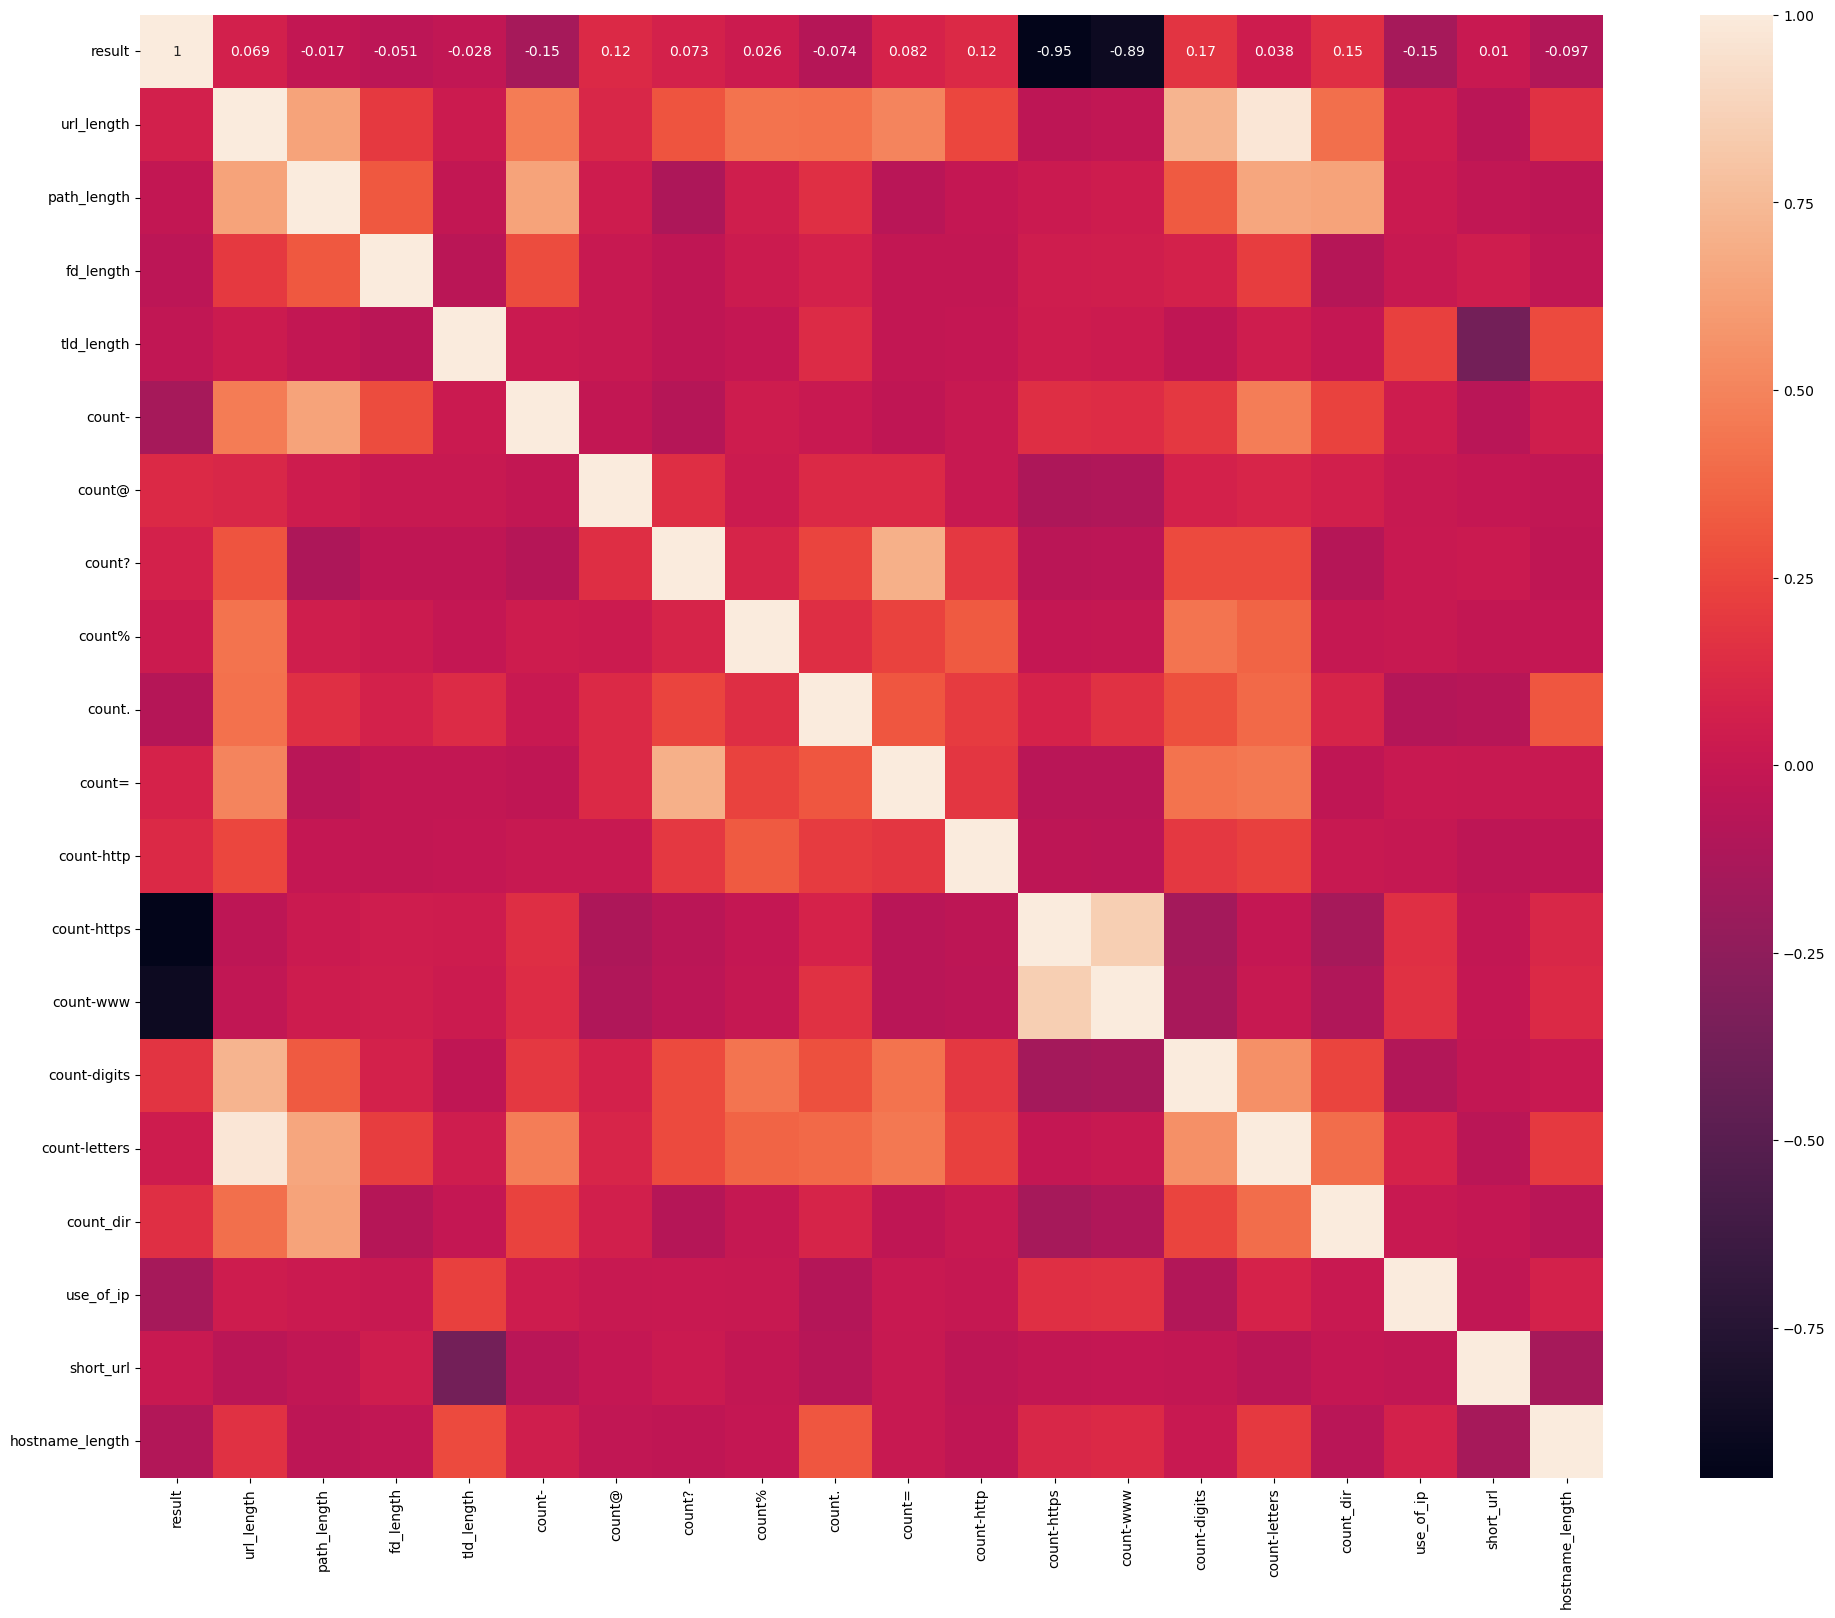

In [77]:
#Heatmap
corrmat = urldata.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

/home/sus/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sus/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sus/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Number Of URLs')

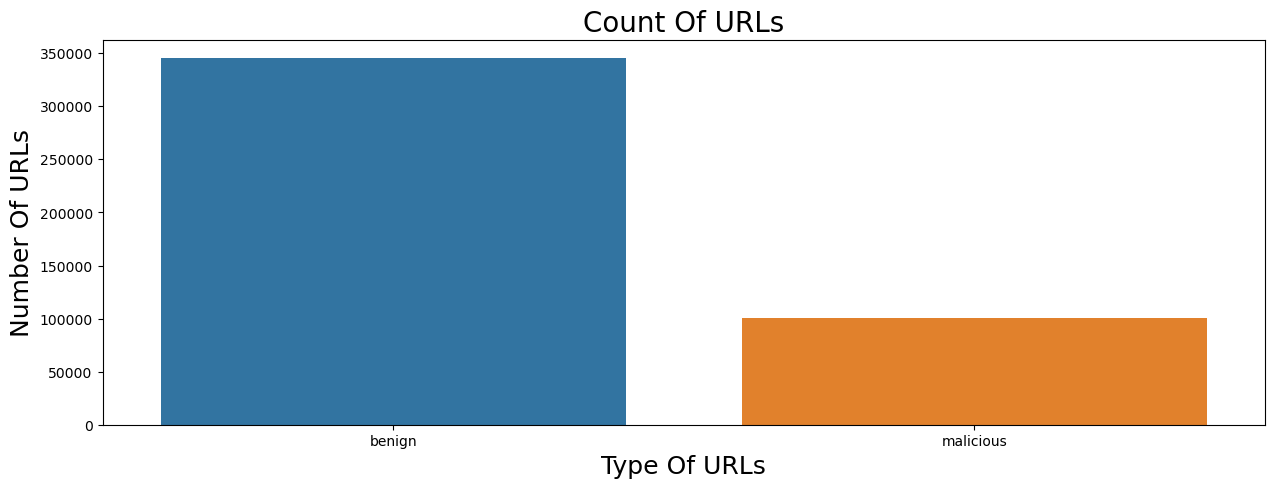

In [78]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [79]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(urldata[urldata['label']=='malicious'])/len(urldata['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(urldata[urldata['label']=='benign'])/len(urldata['label'])*100))

Percent Of Malicious URLs:22.62 %
Percent Of Benign URLs:77.38 %


The data shows a class imbalance to some extent.

(0.0, 1000.0)

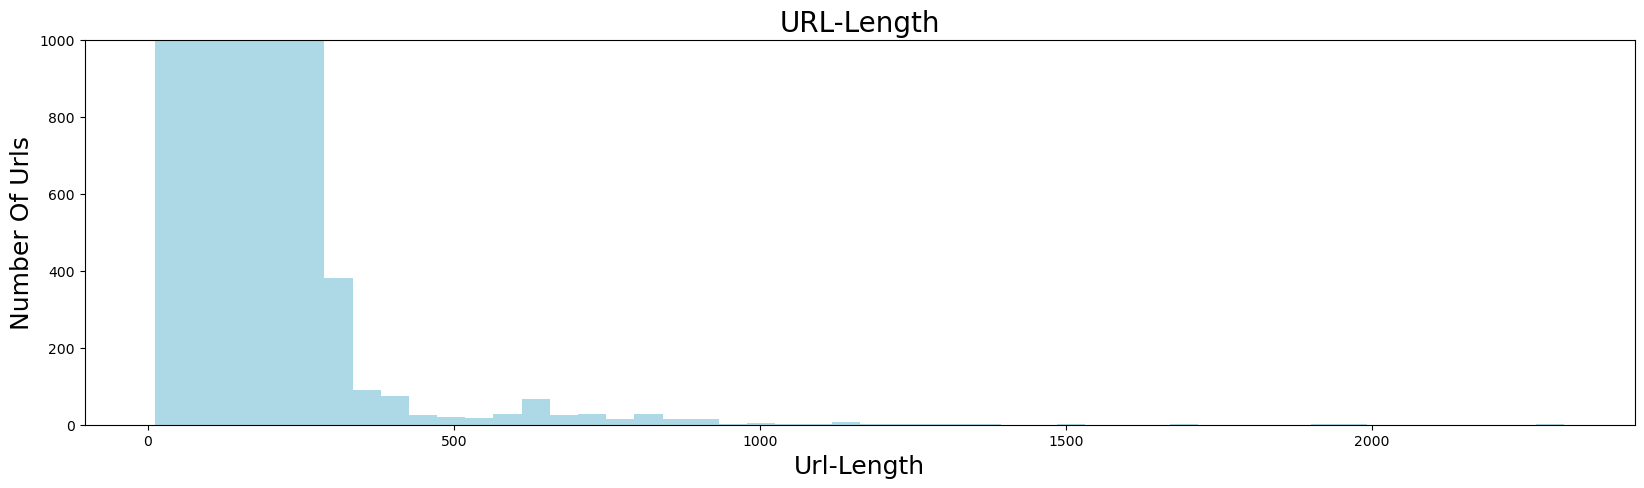

In [80]:
plt.figure(figsize=(20,5))
plt.hist(urldata['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)


(0.0, 1000.0)

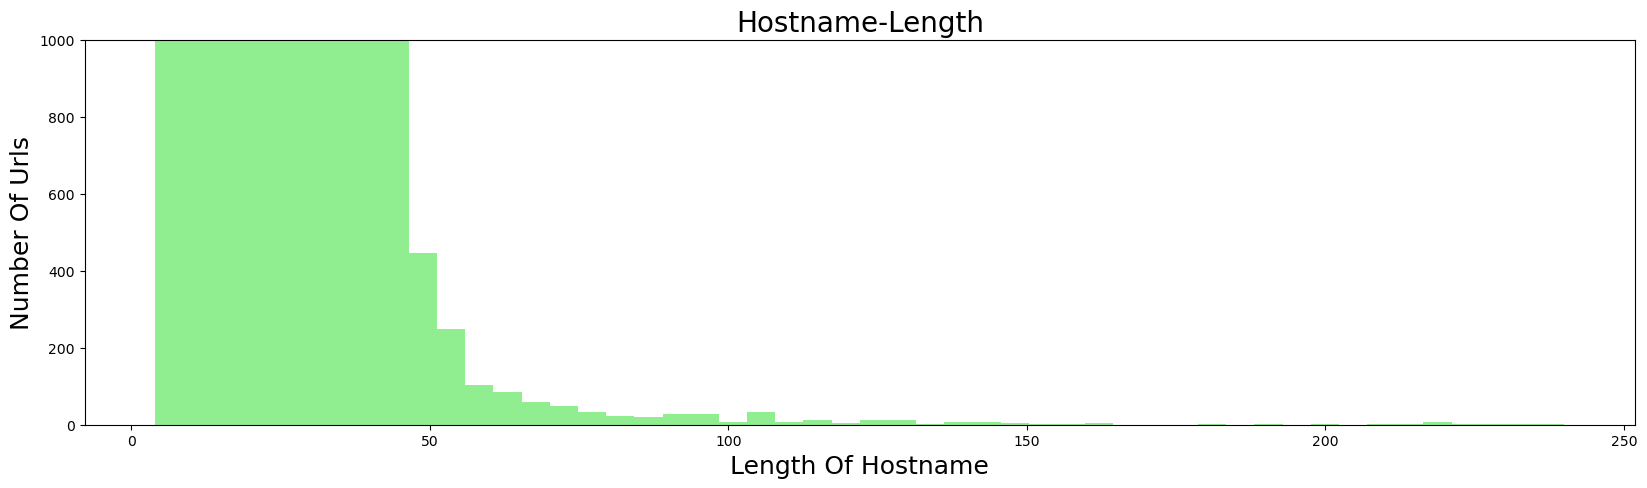

In [81]:
plt.figure(figsize=(20,5))
plt.hist(urldata['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

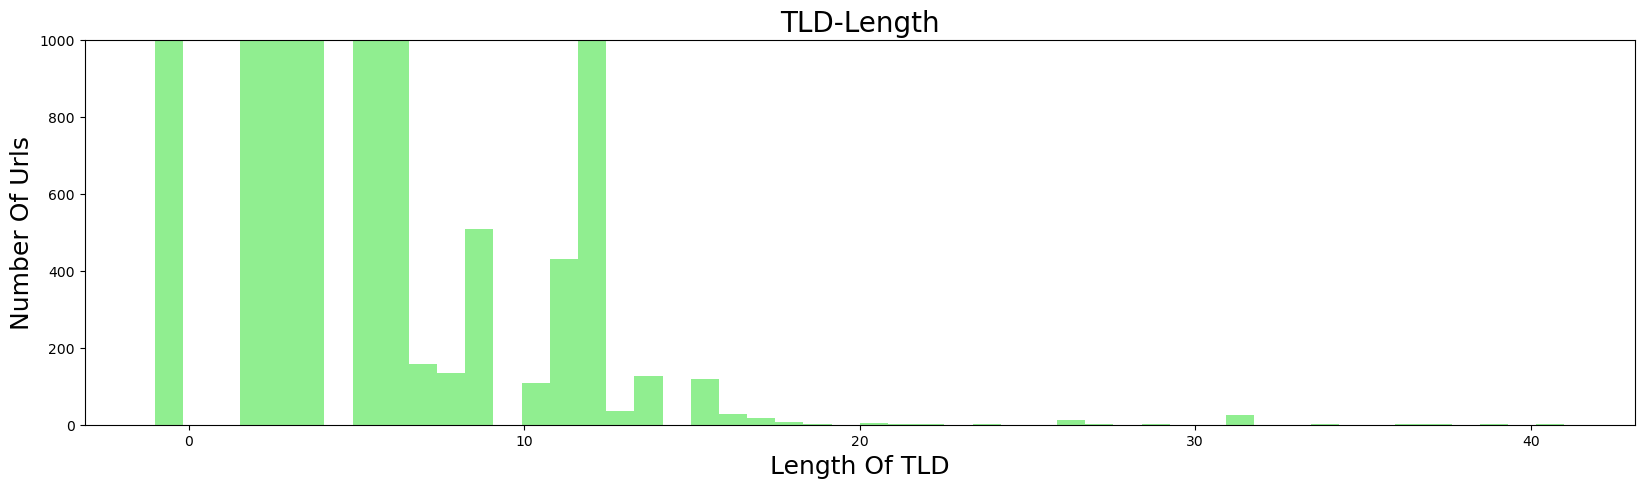

In [82]:
plt.figure(figsize=(20,5))
plt.hist(urldata['tld_length'],bins=50,color='Lightgreen')
plt.title("TLD-Length",fontsize=20)
plt.xlabel("Length Of TLD",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

/home/sus/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sus/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sus/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Number Of URLs')

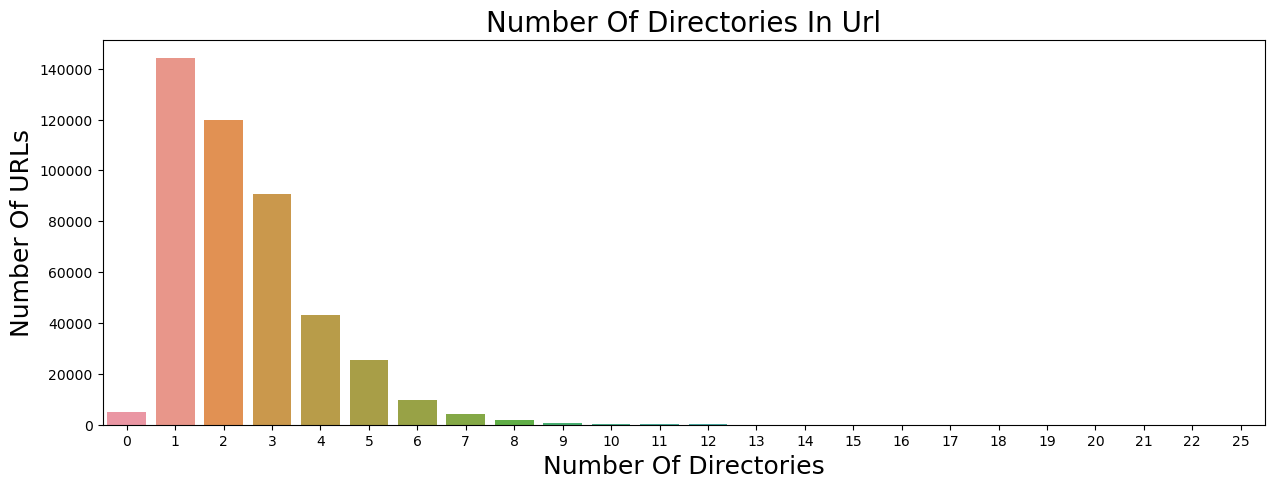

In [83]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

/home/sus/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sus/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sus/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sus/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

Text(0, 0.5, 'Number Of URLs')

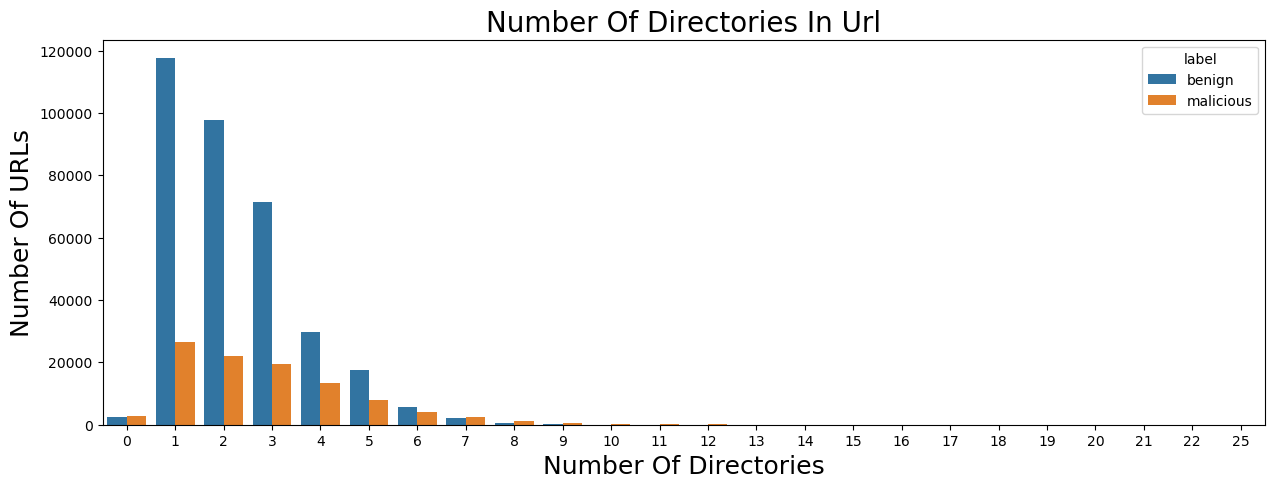

In [84]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

## 3. Building Models Using Lexical Features Only

I will be using three models for my classification.
<br>1. Logistic Regression
<br>2. Decision Trees
<br>3. Random Forest

In [94]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/0c/2a/d3ff6091406bc2207e0adb832ebd15e40ac685811c7e2e3b432bfd969b71/scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/ef/1b/7538792254aec6850657d5b940fd05fe60582af829ffe40d6c054f065f34/scipy-1.11.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 735.2 kB/s eta 0:00:00 kB/s eta 0:00:01
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-a

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression



In [96]:
#Predictor Variables
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'tld_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Target Variable
y = urldata['result']

In [97]:
x.shape

(446397, 17)

In [98]:
y.shape

(446397,)

In [131]:
#Splitting the data into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

In [132]:
#Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

dt_predictions = dt_model.predict(x_test)
accuracy_score(y_test,dt_predictions)


0.9959453405017921

In [133]:
print(confusion_matrix(y_test,dt_predictions))

[[103254    279]
 [   264  30123]]


In [134]:
#Random Forest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_predictions = rfc.predict(x_test)
accuracy_score(y_test, rfc_predictions)

0.9974537037037037

In [135]:
print(confusion_matrix(y_test,rfc_predictions))

[[103421    112]
 [   229  30158]]


In [136]:
#Logistic Regression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

log_predictions = log_model.predict(x_test)
accuracy_score(y_test,log_predictions)

/home/sus/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.995586917562724

In [137]:
print(confusion_matrix(y_test,log_predictions))

[[103278    255]
 [   336  30051]]


Overall all the models showed great results with decent accuracy and low error rate.

Further Improvements<br>
1. Analyse the code and tags used in the webpages.
2. Reduce the class imbalance problem.

In [112]:
from http.server import SimpleHTTPRequestHandler,HTTPServer

In [165]:
[['hostname_length',
       'path_length', 'fd_length', 'tld_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]
def ExtractFeatures(i):
    if(not validators.url(i)):
        return False
    
    test={"hostname_length":len(urlparse(i).netloc)}
    test['path_length']=len(urlparse(i).path)
    test['fd_length']=fd_length(i)
    test['tld_length']=tld_length(i)
    test['count-']=i.count('-')
    test['count@']=i.count('@')
    test['count?']=i.count('?')
    test['count%']=i.count('%')
    test['count.']=i.count('.')
    test['count=']=i.count('=')
    test['count-http']=i.count('http')
    test['count-https']=i.count('https')
    test['count-www']=i.count('www')
    test['count-digits']=digit_count(i)
    test['count-letters']=letter_count(i)
    test['count_dir']=no_of_dir(i)
    test['use_of_ip']=having_ip_address(i)
    return pd.DataFrame(pd.Series(test)).transpose()

##testing if its in the right format
ExtractFeatures("https://www.youtube.com/watch?v=QjmjHS3uydo&t=385s")

,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip
0,15,6,5,50,0,0,1,0,2,2,1,1,1,4,36,1,1


In [ ]:
class SimpleHTTPProxy(SimpleHTTPRequestHandler):
  proxy_routes = {}
  @classmethod
  def set_routes(cls,proxy_routes):
    cls.proxy_routes = proxy_routes
  def do_GET(self):
    print(self.path)
    live_data = ExtractFeatures(self.path)
    result = rfc.predict(live_data)
    print(result)
    if result==False:
      print("Malicious")
      self.proxy_request(self.path)
        
    def proxy_request(self,url):
      try:
        response = request.urlopen(url)
      except error.HTTPError as e:
        print('err')
        self.send_response_only(e.code)
        self.end_headers()
        return 
      self.send_response_only(response.status)
      for name,value in response.header.items():
        self.send_header(name,value)
      self.end_headers()
      self.copyfile(response,self.wfile)

        
#SimpleHTTPProxy.set_routes({'proxy_route':'http://demo.testfire.net/'})
with HTTPServer(('127.0.0.1',1234),SimpleHTTPProxy) as httpd:
  host, port = httpd.socket.getsockname()
  print(f'Listening on http://{host}:{port}')
  try:
    httpd.serve_forever()
  except KeyboardInterrupt:
    print("\nKeyboard interrupt received, exiting......")
    sys.exit(0)

Listening on http://127.0.0.1:1234
